# Project Goals

The goal of this project is to identify what movies will be the most successful at the box office based on genre. Here we define success as an ROI greater than or equal to 2 and an average rating >= 7.5. These standards follow the industry standards for a successful movie. 

## Data

The data was sourced from the im.db database and the tn.db database. These databases were joined with SQL to create the database ('my.db') in which we are working off  of for our exploratory data analysis.

## Exploratory Data Analysis

Import the necessary modules and connect to the SQL database

In [172]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('my.db')
cur = conn.cursor()

import os
os.getcwd()


'/Users/sabrinasayed/Documents/Flatiron/Phase 2/Phase-2-Project/EDA'

In [173]:
ratings_budgets_df = pd.read_csv('/Users/sabrinasayed/Documents/Flatiron/Phase 2/Phase-2-Project/EDA/cleaned_merged_data.csv')

The Genres dataframe is meant to be a subset of our ratings_budgets_df that "explodes" the genre column in order to separate the genres and be able to analyze them separately.

In [174]:
# Drop unnecessary columns for the genre dataframe. Keep the variables we want to analyze with genres
genres_df = ratings_budgets_df.drop(['num_votes', 'domestic_gross','start_year', 'runtime_mins'],axis=1)


In [175]:
#Split the genre values on the comma in order to get a list and be able to explode it
genres_df['genre'] = genres_df['genre'].str.split(',')
genres_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating
0,2019-06-07,Dark Phoenix,350000000,149762350,"[Action, Adventure, Sci-Fi]",6.0
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,"[Action, Adventure, Sci-Fi]",7.3
2,2018-04-27,Avengers: Infinity War,300000000,2048134200,"[Action, Adventure, Sci-Fi]",8.5
3,2017-11-17,Justice League,300000000,655945209,"[Action, Adventure, Fantasy]",6.5
4,2015-11-06,Spectre,300000000,879620923,"[Action, Adventure, Thriller]",6.8
...,...,...,...,...,...,...
1742,2016-03-18,Krisha,30000,144822,[Drama],7.2
1743,2017-01-27,Emily,27000,3547,[Drama],6.8
1744,2000-01-14,The Terrorist,25000,195043,"[Romance, Thriller]",6.5
1745,2001-07-06,Cure,10000,94596,[Drama],4.9


In [176]:
# Explode the genre column 
genres_df = genres_df.explode('genre')
genres_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating
0,2019-06-07,Dark Phoenix,350000000,149762350,Action,6.0
0,2019-06-07,Dark Phoenix,350000000,149762350,Adventure,6.0
0,2019-06-07,Dark Phoenix,350000000,149762350,Sci-Fi,6.0
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Action,7.3
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Adventure,7.3
...,...,...,...,...,...,...
1744,2000-01-14,The Terrorist,25000,195043,Romance,6.5
1744,2000-01-14,The Terrorist,25000,195043,Thriller,6.5
1745,2001-07-06,Cure,10000,94596,Drama,4.9
1746,2012-01-13,Newlyweds,9000,4584,Comedy,6.4


In [177]:
ratings_budgets_df

,release_date,title,prod_budget,domestic_gross,worldwide_gross,start_year,runtime_mins,genre,average_rating,num_votes
0,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
1,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,2017-11-17,Justice League,300000000,229024295,655945209,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
4,2015-11-06,Spectre,300000000,200074175,879620923,2015,148.0,"Action,Adventure,Thriller",6.8,352504
...,...,...,...,...,...,...,...,...,...,...
1742,2016-03-18,Krisha,30000,144822,144822,2015,83.0,Drama,7.2,5917
1743,2017-01-27,Emily,27000,3547,3547,2017,83.0,Drama,6.8,13
1744,2000-01-14,The Terrorist,25000,195043,195043,2018,86.0,"Romance,Thriller",6.5,42
1745,2001-07-06,Cure,10000,94596,94596,2011,93.0,Drama,4.9,11


### Creating the Genre Dataframe

In [178]:
ratings_budgets_df.to_sql('ratings_budgets', conn, if_exists='replace', index=False)

In [179]:
genres_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating
0,2019-06-07,Dark Phoenix,350000000,149762350,Action,6.0
0,2019-06-07,Dark Phoenix,350000000,149762350,Adventure,6.0
0,2019-06-07,Dark Phoenix,350000000,149762350,Sci-Fi,6.0
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Action,7.3
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Adventure,7.3
...,...,...,...,...,...,...
1744,2000-01-14,The Terrorist,25000,195043,Romance,6.5
1744,2000-01-14,The Terrorist,25000,195043,Thriller,6.5
1745,2001-07-06,Cure,10000,94596,Drama,4.9
1746,2012-01-13,Newlyweds,9000,4584,Comedy,6.4


# SQL querying:

## Highest grossing films (domestic) from highest to lowest domestic grossing:


In [180]:
query = ''' 
SELECT title, release_date, genre, domestic_gross
FROM ratings_budgets
ORDER BY domestic_gross DESC
LIMIT 26


'''

cur.execute(query)
result = pd.read_sql_query(query, conn)
print(result)

                              title release_date                       genre  \
0                     Black Panther   2018-02-16     Action,Adventure,Sci-Fi   
1            Avengers: Infinity War   2018-04-27     Action,Adventure,Sci-Fi   
2                    Jurassic World   2015-06-12     Action,Adventure,Sci-Fi   
3                      The Avengers   2012-05-04     Action,Adventure,Sci-Fi   
4                     Incredibles 2   2018-06-15  Action,Adventure,Animation   
5              Beauty and the Beast   2017-03-17      Family,Fantasy,Musical   
6                      Finding Dory   2016-06-17  Adventure,Animation,Comedy   
7           Avengers: Age of Ultron   2015-05-01     Action,Adventure,Sci-Fi   
8             The Dark Knight Rises   2012-07-20             Action,Thriller   
9                    Captain Marvel   2019-03-08     Action,Adventure,Sci-Fi   
10  The Hunger Games: Catching Fire   2013-11-22     Action,Adventure,Sci-Fi   
11   Jurassic World: Fallen Kingdom   20

In [49]:
query = ''' 
SELECT title, release_date, genre, domestic_gross
FROM ratings_budgets
ORDER BY domestic_gross DESC
LIMIT 26


'''

cur.execute(query)
result = pd.read_sql_query(query, conn)
print(result)

                              title release_date                       genre  \
0                     Black Panther   2018-02-16     Action,Adventure,Sci-Fi   
1            Avengers: Infinity War   2018-04-27     Action,Adventure,Sci-Fi   
2                    Jurassic World   2015-06-12     Action,Adventure,Sci-Fi   
3                      The Avengers   2012-05-04     Action,Adventure,Sci-Fi   
4                     Incredibles 2   2018-06-15  Action,Adventure,Animation   
5              Beauty and the Beast   2017-03-17      Family,Fantasy,Musical   
6                      Finding Dory   2016-06-17  Adventure,Animation,Comedy   
7           Avengers: Age of Ultron   2015-05-01     Action,Adventure,Sci-Fi   
8             The Dark Knight Rises   2012-07-20             Action,Thriller   
9                    Captain Marvel   2019-03-08     Action,Adventure,Sci-Fi   
10  The Hunger Games: Catching Fire   2013-11-22     Action,Adventure,Sci-Fi   
11   Jurassic World: Fallen Kingdom   20

17 out of 20 of the highest grossing films are franchises!

### Highest grossing films worldwide (desc):

In [50]:
query = ''' 
SELECT title, release_date, genre
FROM ratings_budgets
ORDER BY worldwide_gross DESC
LIMIT 26


'''

cur.execute(query)
result = pd.read_sql_query(query, conn)
print(result)

                                title release_date                       genre
0              Avengers: Infinity War   2018-04-27     Action,Adventure,Sci-Fi
1                      Jurassic World   2015-06-12     Action,Adventure,Sci-Fi
2                        The Avengers   2012-05-04     Action,Adventure,Sci-Fi
3             Avengers: Age of Ultron   2015-05-01     Action,Adventure,Sci-Fi
4                       Black Panther   2018-02-16     Action,Adventure,Sci-Fi
5      Jurassic World: Fallen Kingdom   2018-06-22     Action,Adventure,Sci-Fi
6                              Frozen   2013-11-22       Adventure,Drama,Sport
7                Beauty and the Beast   2017-03-17      Family,Fantasy,Musical
8                       Incredibles 2   2018-06-15  Action,Adventure,Animation
9             The Fate of the Furious   2017-04-14       Action,Crime,Thriller
10                            Minions   2015-07-10  Adventure,Animation,Comedy
11                            Aquaman   2018-12-21  

### Highest ROI's (desc)

In [51]:
query = ''' 
SELECT title, release_date, genre, ((worldwide_gross-prod_budget)/prod_budget) AS ROI_W
FROM ratings_budgets
WHERE ROI_W >= 2
ORDER BY ROI_W DESC
LIMIT 30
'''

cur.execute(query)
result = pd.read_sql_query(query, conn)
print(result)

                      title release_date                    genre  ROI_W
0               The Gallows   2015-07-10  Horror,Mystery,Thriller    415
1                     Bambi   1942-08-13    Biography,Documentary    311
2                     Rocky   1976-11-21      Action,Comedy,Drama    224
3          The Devil Inside   2012-01-06                   Horror    100
4            Graduation Day   1981-05-01                 Thriller     94
5                 Insidious   2011-04-01  Horror,Mystery,Thriller     65
6                Unfriended   2015-04-17  Horror,Mystery,Thriller     63
7                     Benji   1974-11-15        Documentary,Sport     62
8     Paranormal Activity 2   2010-10-20                   Horror     58
9                     Split   2017-01-20                    Drama     54
10                  Get Out   2017-02-24  Horror,Mystery,Thriller     50
11                Moonlight   2016-10-21                    Drama     42
12        Chernobyl Diaries   2012-05-25  Horror,My

We can immediately recognize that Horror, Mystery, and Thriller movies are rampant in this High ROI list.

## Most Successful Movies: 
    ROI >= 2 and average ratings >= 7.5


In [181]:
query = ''' 
SELECT title, genre, average_rating, ((worldwide_gross-prod_budget)/prod_budget) AS ROI_W
FROM ratings_budgets
WHERE ROI_W >= 2 AND average_rating >= 7.5
ORDER BY average_rating DESC
LIMIT 20
'''

cur.execute(query)
result = pd.read_sql_query(query, conn)
print(result)

                          title                       genre  average_rating  \
0                     Inception     Action,Adventure,Sci-Fi             8.8   
1                      The Rock                      Comedy             8.7   
2                      Snow Day    Action,Documentary,Drama             8.7   
3                  Interstellar      Adventure,Drama,Sci-Fi             8.6   
4                          Fame                 Documentary             8.6   
5        Avengers: Infinity War     Action,Adventure,Sci-Fi             8.5   
6                           Big                 Documentary             8.5   
7                        Dangal      Action,Biography,Drama             8.5   
8                      Whiplash                 Drama,Music             8.5   
9         The Dark Knight Rises             Action,Thriller             8.4   
10             Django Unchained               Drama,Western             8.4   
11                          Red                     

Inception is the most succesful movie according to our standards. It's an action, adventure, sci-fi film. We can still see some franchise movies on this list. 

In [187]:
conn = sqlite3.connect('your_database.db', timeout=10)
genres_df.to_sql('movie_genres', conn, if_exists='replace', index=False)

## Highest ROI genres by film:
1. Horror
2. Mystery
3. Thriller
4. Documentary
5. Action

In [188]:
query = ''' 
SELECT genre, worldwide_gross,(worldwide_gross - prod_budget)/prod_budget AS ROI
FROM movie_genres
WHERE ROI >= 2
ORDER BY ROI DESC
LIMIT 50

'''

cur.execute(query)
result = pd.read_sql_query(query, conn)
print(result)

          genre  worldwide_gross  ROI
0        Horror         41656474  415
1       Mystery         41656474  415
2      Thriller         41656474  415
3     Biography        268000000  311
4   Documentary        268000000  311
5        Action        225000000  224
6        Comedy        225000000  224
7         Drama        225000000  224
8        Horror        101759490  100
9      Thriller         23894000   94
10       Horror         99870886   65
11      Mystery         99870886   65
12     Thriller         99870886   65
13       Horror         64364198   63
14      Mystery         64364198   63
15     Thriller         64364198   63
16  Documentary         31559560   62
17        Sport         31559560   62
18       Horror        177512032   58
19        Drama        278964806   54
20       Horror        255367951   50
21      Mystery        255367951   50
22     Thriller        255367951   50
23        Drama         65245512   42
24       Horror         42411721   41
25      Myst

### The Top Genres with the Highest Average ROI
1. Mystery
2. Horror
3. Thriller
4. Documentary
5. Biography


In [183]:
query = ''' 
SELECT genre, COUNT(genre) AS genre_freq, AVG((worldwide_gross - prod_budget)/prod_budget) AS avg_ROI
FROM movie_genres
GROUP BY genre
ORDER BY avg_ROI DESC



'''

cur.execute(query)
result = pd.read_sql_query(query, conn)
print(result)

          genre  genre_freq   avg_ROI
0       Mystery         137  8.890511
1        Horror         201  8.313433
2      Thriller         292  5.294521
3   Documentary         105  5.076190
4     Biography         150  4.186667
5        Comedy         550  2.547273
6         Drama         885  2.430508
7        Sci-Fi         138  2.384058
8       Romance         218  2.330275
9         Sport          43  2.279070
10       Action         448  2.261161
11    Animation         100  2.200000
12        Music          55  2.181818
13      Fantasy         128  1.953125
14    Adventure         352  1.855114
15      Musical          11  1.727273
16       Family          96  1.520833
17        Crime         247  1.222672
18      History          48  1.187500
19          War          26  1.000000
20      Western          12  0.750000
21         News           1  0.000000


In [184]:
conn.close()

# Statistical and Visual Analysis

Based on our results from above, we saw that a few genres have very few data attached to them. We'll count them as outliers and remove them completely.

In [189]:
genres_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating
0,2019-06-07,Dark Phoenix,350000000,149762350,Action,6.0
0,2019-06-07,Dark Phoenix,350000000,149762350,Adventure,6.0
0,2019-06-07,Dark Phoenix,350000000,149762350,Sci-Fi,6.0
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Action,7.3
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Adventure,7.3
...,...,...,...,...,...,...
1744,2000-01-14,The Terrorist,25000,195043,Romance,6.5
1744,2000-01-14,The Terrorist,25000,195043,Thriller,6.5
1745,2001-07-06,Cure,10000,94596,Drama,4.9
1746,2012-01-13,Newlyweds,9000,4584,Comedy,6.4


In [58]:
genres_df = genres_df[genres_df['genre'] != 'News']

In [59]:
genres_df = genres_df[genres_df['genre'] != 'Musical']

In [60]:
genres_df = genres_df[genres_df['genre'] != 'Western']

In [61]:
genres_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating
0,2019-06-07,Dark Phoenix,350000000,149762350,Action,6.0
0,2019-06-07,Dark Phoenix,350000000,149762350,Adventure,6.0
0,2019-06-07,Dark Phoenix,350000000,149762350,Sci-Fi,6.0
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Action,7.3
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Adventure,7.3
...,...,...,...,...,...,...
1744,2000-01-14,The Terrorist,25000,195043,Romance,6.5
1744,2000-01-14,The Terrorist,25000,195043,Thriller,6.5
1745,2001-07-06,Cure,10000,94596,Drama,4.9
1746,2012-01-13,Newlyweds,9000,4584,Comedy,6.4


ROI is a major variable for our measure of success, so we'll create the column for it now.

In [228]:
genres_df['ROI'] = (genres_df['worldwide_gross'] - genres_df['prod_budget']) / genres_df['prod_budget']

genres_df.sort_values(by ='ROI', ascending = False)



,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI
1732,2015-07-10,The Gallows,100000,41656474,Horror,4.2,415.564740
1732,2015-07-10,The Gallows,100000,41656474,Mystery,4.2,415.564740
1732,2015-07-10,The Gallows,100000,41656474,Thriller,4.2,415.564740
1668,1942-08-13,Bambi,858000,268000000,Biography,7.0,311.354312
1668,1942-08-13,Bambi,858000,268000000,Documentary,7.0,311.354312
...,...,...,...,...,...,...,...
1696,2018-05-11,Higher Power,500000,528,Sci-Fi,5.3,-0.998944
1696,2018-05-11,Higher Power,500000,528,Thriller,5.3,-0.998944
895,1999-10-22,Molly,21000000,17396,Sci-Fi,4.6,-0.999172
895,1999-10-22,Molly,21000000,17396,Action,4.6,-0.999172


Let's subset the genres dataframe further to be able to better visualize the data by focusing on the top 5 genres with the highest average ROIs

In [229]:
subset_genres_df = genres_df[genres_df['genre'].isin(['Mystery', 'Thriller','Horror', 'Documentary', 'Biography'])]
subset_genres_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI
4,2015-11-06,Spectre,300000000,879620923,Thriller,6.8,1.932070
5,2012-07-20,The Dark Knight Rises,275000000,1084439099,Thriller,8.4,2.943415
15,2017-04-14,The Fate of the Furious,250000000,1234846267,Thriller,6.7,3.939385
31,2012-11-08,Skyfall,200000000,1110526981,Thriller,7.8,4.552635
43,2013-06-21,World War Z,190000000,531514650,Horror,7.0,1.797446
...,...,...,...,...,...,...,...
1735,2014-06-19,The Past is a Grotesque Animal,100000,20056,Documentary,7.2,-0.799440
1736,2015-07-17,Dawn of the Crescent Moon,75000,8799,Thriller,5.1,-0.882680
1740,2015-07-31,Counting,50000,8374,Documentary,6.0,-0.832520
1741,2011-02-11,Raymond Did It,40000,3632,Horror,3.3,-0.909200


<ipython-input-230-b82ff7751335>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment= 'right')


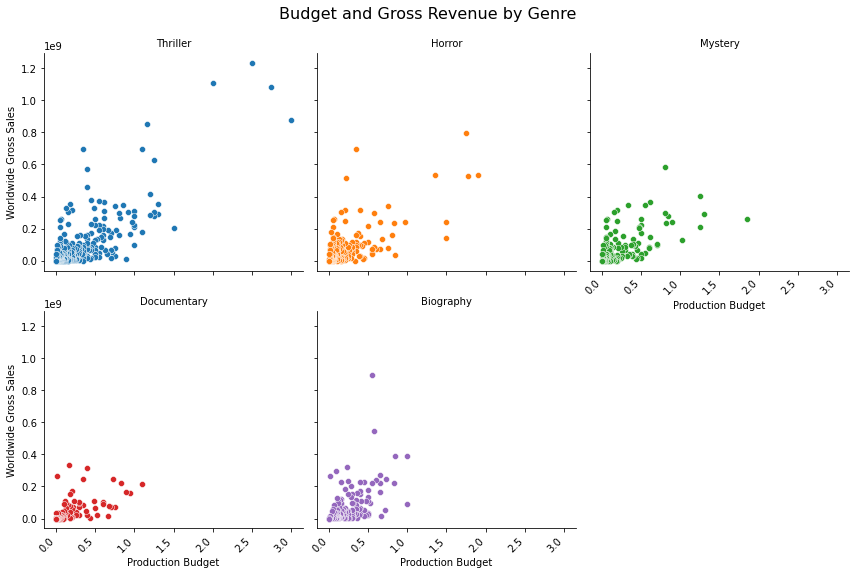

In [230]:
import seaborn as sns 
import matplotlib.pyplot as plt


g = sns.FacetGrid(subset_genres_df, col='genre', col_wrap = 3, height=4, aspect=1, hue='genre')

g.map(sns.scatterplot, 'prod_budget', 'worldwide_gross')

g.set_axis_labels('Production Budget', 'Worldwide Gross Sales')
g.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=.9)
plt.suptitle('Budget and Gross Revenue by Genre', fontsize=16)


for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment= 'right')

plt.savefig('budget_grossrev_by_genre.jpg', transparent = False)

This tells us that as the budget increases there is higher potential to gross more. That makes sense. 

## Most Successful Films:
measured by ROI >=2 & average rating >= 7.5

We'll isolate the films that fall under our success standards into a new dataframe.

In [231]:
most_successful_df = genres_df[genres_df['average_rating'] >= 7.5]
most_successful_df = most_successful_df[most_successful_df['ROI'] >= 2]
most_successful_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI
2,2018-04-27,Avengers: Infinity War,300000000,2048134200,Action,8.5,5.827114
2,2018-04-27,Avengers: Infinity War,300000000,2048134200,Adventure,8.5,5.827114
2,2018-04-27,Avengers: Infinity War,300000000,2048134200,Sci-Fi,8.5,5.827114
5,2012-07-20,The Dark Knight Rises,275000000,1084439099,Action,8.4,2.943415
5,2012-07-20,The Dark Knight Rises,275000000,1084439099,Thriller,8.4,2.943415
...,...,...,...,...,...,...,...
1671,2011-12-30,Jodaeiye Nader az Simin,800000,24426169,Drama,8.3,29.532711
1671,2011-12-30,Jodaeiye Nader az Simin,800000,24426169,Thriller,8.3,29.532711
1716,2012-07-20,Burn,225000,1109276,Documentary,7.5,3.930116
1724,2011-09-23,Weekend,190000,1577585,Drama,7.6,7.303079


In [279]:
#Separate the highest grossing films into a new dataframe
highest_grossing_films = ratings_budgets_df.sort_values(by='worldwide_gross', ascending=False)[0:10]

In [233]:

highest_grossing_films

,release_date,title,prod_budget,domestic_gross,worldwide_gross,start_year,runtime_mins,genre,average_rating,num_votes
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
22,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
17,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
1,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
26,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148
71,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125
101,2013-11-22,Frozen,150000000,400738009,1272469910,2010,93.0,"Adventure,Drama,Sport",6.2,62311
89,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,2017,129.0,"Family,Fantasy,Musical",7.2,238325
27,2018-06-15,Incredibles 2,200000000,608581744,1242520711,2018,118.0,"Action,Adventure,Animation",7.7,203510
15,2017-04-14,The Fate of the Furious,250000000,225764765,1234846267,2017,136.0,"Action,Crime,Thriller",6.7,179774


## Visualizing Franchise Success with worldwide gross revenue

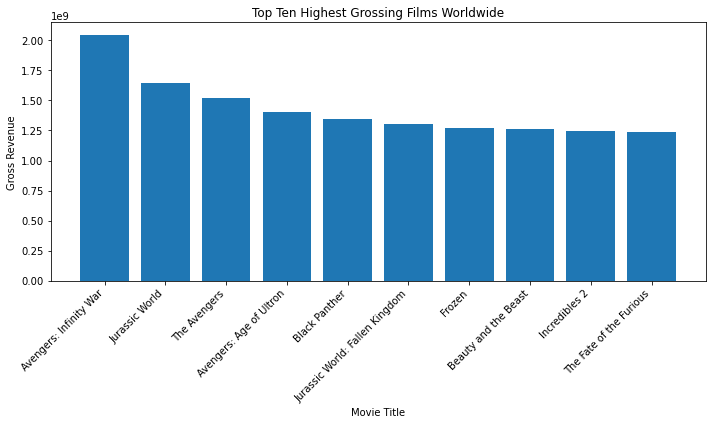

In [234]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x= highest_grossing_films['title']
plt.figure(figsize=(10, 6))

plt.bar('title', 'worldwide_gross', data= highest_grossing_films)
plt.xticks(rotation=45, ticks=np.arange(len(x)), labels=x, ha= 'right')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.xlabel('Movie Title')
plt.ylabel('Gross Revenue')
plt.title('Top Ten Highest Grossing Films Worldwide')
plt.tight_layout()
plt.savefig('highest_grossing_films.jpg')

This shows that the highest grossing films in the world are franchises. Our first recommendation will be to invest in a franchise film. 

## Distribution of Production Budget and Gross Revenue By Genre

In [254]:
subset_genres_df['Average Budget By Genre'] =  subset_genres_df.groupby('genre')['prod_budget'].mean()

<ipython-input-254-ac1e833c9fae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_genres_df['Average Budget By Genre'] =  subset_genres_df.groupby('genre')['prod_budget'].mean()


In [256]:
subset_genres_df = subset_genres_df.drop(columns= ['Average Budget By Genre'])

In [258]:
average_budget_gross_rev= subset_genres_df[['genre', 'worldwide_gross','prod_budget']]


No handles with labels found to put in legend.


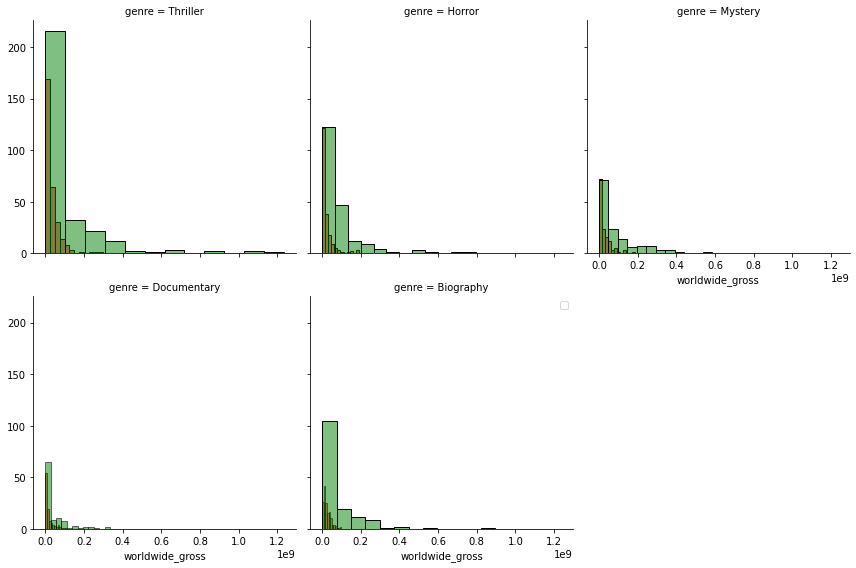

In [278]:

j = sns.FacetGrid(subset_genres_df, col='genre', col_wrap=3, height=4)
j.map(sns.histplot, 'prod_budget', color='red', kde=False, bins=12, alpha=0.5)
j.map(sns.histplot, 'worldwide_gross', color='green', kde=False, bins=12, alpha=0.5)

for ax in g.axes.flatten():
    ax.legend(['Production Budget', 'Worldwide Gross'])
plt.legend()

plt.tight_layout()

## Distribution production budget with average rating

<ipython-input-282-6d2ebb948274>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment= 'right')


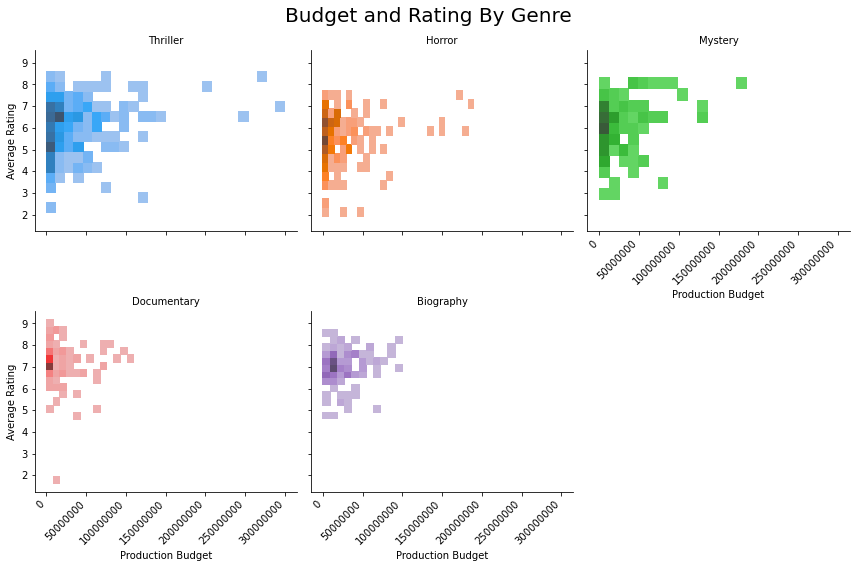

In [282]:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


g = sns.FacetGrid(subset_genres_df, col='genre', col_wrap = 3, height=4, aspect=1, hue='genre')

g.map(sns.histplot, 'prod_budget', 'average_rating')

g.set_axis_labels('Production Budget', 'Average Rating')
g.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=.9)
plt.suptitle('Budget and Rating By Genre', fontsize=20)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment= 'right')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.tight_layout()
plt.savefig('budget_rating_by_genre.jpg', transparent = False)


This tells us that the critics ratings are not strongly correlated with the budget. Low budget films can receive high critic ratings across all genres. In fact it looks as though the highest ratings are concentrated on the lowest end of the production budget.

What is the relationship between budget and genre?

In [295]:
budget_genre = subset_genres_df[['genre','prod_budget']]

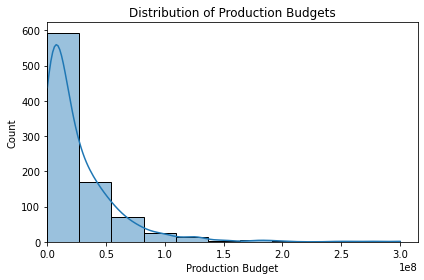

In [314]:
sns.histplot(data=subset_genres_df, x='prod_budget', bins=11, kde=True, alpha=.45)
plt.xlim(left=0) 
plt.xlabel('Production Budget')
plt.title('Distribution of Production Budgets')
plt.tight_layout()
plt.savefig('budget_distribution.jpg')

This shows us that production budgets skew to under 50 million for the top performing genres.

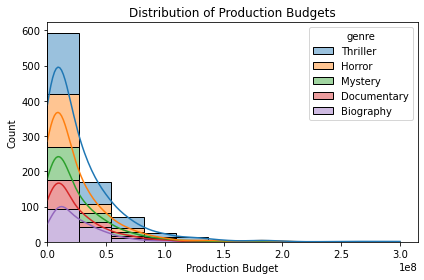

In [321]:
sns.histplot(data=subset_genres_df, x='prod_budget', bins=11, hue='genre', multiple='stack', kde=True, alpha=.45)
plt.xlim(left=0) 
plt.xlabel('Production Budget')
plt.title('Distribution of Production Budgets')
plt.tight_layout()
plt.savefig('budget_distribution.jpg')

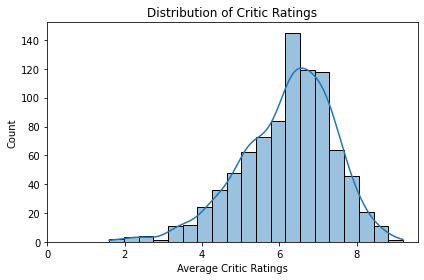

In [322]:
sns.histplot(data=subset_genres_df, x='average_rating', multiple='stack', bins=20, kde=True, alpha=.45)
plt.xlim(left=0) 
plt.xlabel('Average Critic Ratings')
plt.title('Distribution of Critic Ratings')
plt.tight_layout()
plt.savefig('ratings_distribution.jpg')

Of the Most Succesful Films:
 
Group by the Average ROI of Each Genre

In [236]:
avg_ROI_df = most_successful_df.groupby('genre')['ROI'].mean().reset_index()
avg_ROI_df.sort_values(by='ROI', ascending=False)

,genre,ROI
11,Horror,32.486799
12,Music,15.466273
14,Mystery,13.236735
18,Thriller,9.718535
15,Romance,9.617793
8,Family,8.058183
7,Drama,7.190279
3,Biography,7.158525
4,Comedy,7.065327
17,Sport,6.447671


In [237]:
avg_ratings_df = most_successful_df.groupby('genre')['average_rating'].mean().reset_index()
avg_ratings_df

,genre,average_rating
0,Action,7.833333
1,Adventure,7.856410
2,Animation,7.800000
3,Biography,7.766667
4,Comedy,7.870588
5,Crime,7.807692
6,Documentary,7.933333
7,Drama,7.842222
8,Family,7.866667
9,Fantasy,7.766667


## Average Ratings by Genre

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


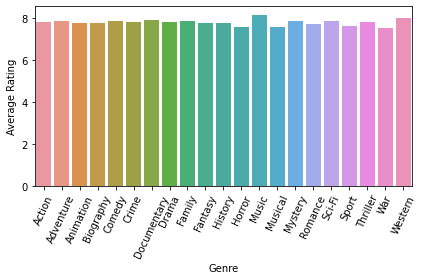

In [238]:
sns.barplot('genre', 'average_rating', data = avg_ratings_df)

plt.xticks(rotation=65)
plt.xlabel('Genre')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.savefig('avg_ratings_by_genre.jpg')

We're not seeing any significant differences here by genre. This is surprising but we can look at other variables and see what might affect the ratings.

<ipython-input-239-23d8706586b7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment= 'right')


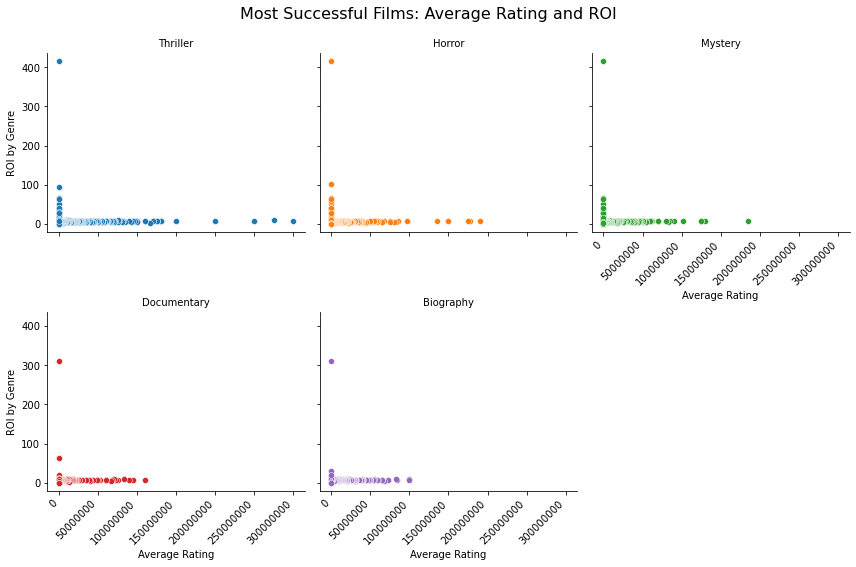

In [239]:

c = sns.FacetGrid(most_successful_df, col='genre', col_wrap = 5, height=4, aspect=1, hue='genre')

g.map(sns.scatterplot, 'average_rating', 'ROI')

g.set_axis_labels('Average Rating', 'ROI by Genre')
g.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=.9)
plt.suptitle('Most Successful Films: Average Rating and ROI', fontsize=16)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment= 'right')

plt.show()


In [243]:
#Group by genre by taking the average ROI
top_genres_by_rating_avgROI =genres_df.groupby('genre')['ROI'].mean().reset_index().sort_values(by='ROI', ascending=False)

In [360]:
top_genres_by_rating_avgROI.columns = ['genre', 'Avg_ROI']
top_genres_by_rating_avgROI = top_genres_by_rating_avgROI[top_genres_by_rating_avgROI['Avg_ROI'] > 0]
top_genres_by_rating_avgROI


,genre,Avg_ROI
14,Mystery,9.086906
11,Horror,8.520359
19,Thriller,5.454036
6,Documentary,5.128237
3,Biography,4.254537
4,Comedy,2.762548
17,Sci-Fi,2.619174
2,Animation,2.583700
7,Drama,2.519749
0,Action,2.502561


Highest Average ROIs: Thriller, Horror, Mystery, Biography, Comedy
    how does production budget affect the average ROI?

In [361]:
highest_avgROI_df = genres_df[genres_df['genre'].isin(['Thriller', 'Horror', 'Documentary', 'Mystery', 'Biography', 'Comedy'])]
highest_avgROI_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI,release_year,season_released
4,2015-11-06,Spectre,300000000,879620923,Thriller,6.8,1.932070,2015,Fall
5,2012-07-20,The Dark Knight Rises,275000000,1084439099,Thriller,8.4,2.943415,2012,Summer
9,2010-11-24,Tangled,260000000,586477240,Comedy,7.8,1.255682,2010,Fall
15,2017-04-14,The Fate of the Furious,250000000,1234846267,Thriller,6.7,3.939385,2017,Spring
23,2012-05-25,Men in Black 3,215000000,654213485,Comedy,6.8,2.042853,2012,Spring
...,...,...,...,...,...,...,...,...,...
1739,2010-11-12,Tiny Furniture,50000,424149,Comedy,6.2,7.482980,2010,Fall
1740,2015-07-31,Counting,50000,8374,Documentary,6.0,-0.832520,2015,Summer
1741,2011-02-11,Raymond Did It,40000,3632,Horror,3.3,-0.909200,2011,Winter
1744,2000-01-14,The Terrorist,25000,195043,Thriller,6.5,6.801720,2000,Winter


In [324]:
genres_df['release_date'] = pd.to_datetime(genres_df['release_date'])
genres_df['release_year'] = genres_df['release_date'].dt.year
genres_df

<ipython-input-324-df02c84e7ca1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df['release_date'] = pd.to_datetime(genres_df['release_date'])
<ipython-input-324-df02c84e7ca1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df['release_year'] = genres_df['release_date'].dt.year


,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI,release_year,season_released
0,2019-06-07,Dark Phoenix,350000000,149762350,Action,6.0,-0.572108,2019,Summer
0,2019-06-07,Dark Phoenix,350000000,149762350,Adventure,6.0,-0.572108,2019,Summer
0,2019-06-07,Dark Phoenix,350000000,149762350,Sci-Fi,6.0,-0.572108,2019,Summer
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Action,7.3,3.243841,2015,Spring
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Adventure,7.3,3.243841,2015,Spring
...,...,...,...,...,...,...,...,...,...
1744,2000-01-14,The Terrorist,25000,195043,Romance,6.5,6.801720,2000,Winter
1744,2000-01-14,The Terrorist,25000,195043,Thriller,6.5,6.801720,2000,Winter
1745,2001-07-06,Cure,10000,94596,Drama,4.9,8.459600,2001,Summer
1746,2012-01-13,Newlyweds,9000,4584,Comedy,6.4,-0.490667,2012,Winter


In [325]:


def get_season(date):
    month=date.month
    if month in [1,2,12]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
    
genres_df['season_released'] = genres_df['release_date'].apply(get_season)

genres_df

<ipython-input-325-985c36d84929>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df['season_released'] = genres_df['release_date'].apply(get_season)


,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI,release_year,season_released
0,2019-06-07,Dark Phoenix,350000000,149762350,Action,6.0,-0.572108,2019,Summer
0,2019-06-07,Dark Phoenix,350000000,149762350,Adventure,6.0,-0.572108,2019,Summer
0,2019-06-07,Dark Phoenix,350000000,149762350,Sci-Fi,6.0,-0.572108,2019,Summer
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Action,7.3,3.243841,2015,Spring
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Adventure,7.3,3.243841,2015,Spring
...,...,...,...,...,...,...,...,...,...
1744,2000-01-14,The Terrorist,25000,195043,Romance,6.5,6.801720,2000,Winter
1744,2000-01-14,The Terrorist,25000,195043,Thriller,6.5,6.801720,2000,Winter
1745,2001-07-06,Cure,10000,94596,Drama,4.9,8.459600,2001,Summer
1746,2012-01-13,Newlyweds,9000,4584,Comedy,6.4,-0.490667,2012,Winter


In [326]:
genres_df = genres_df[genres_df['release_year'] >= 1980]

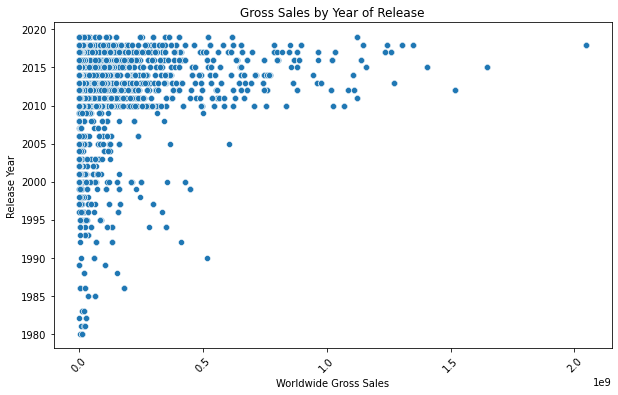

In [327]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='worldwide_gross', y='release_year', data = genres_df)
plt.title('Gross Sales by Year of Release')
plt.xlabel('Worldwide Gross Sales')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()

This tells us that in the past 15 years there was a dramatic shift in earning potential and Gross Revenue shot up. This could be attributed to new technologies like motion capture, CGI, VRX tech, and AI, as we saw with groundbreaking films like Avatar.

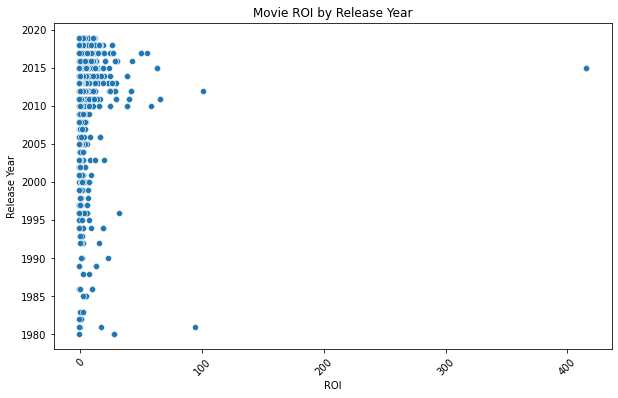

In [81]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='ROI', y='release_year', data = genres_df)
plt.title('Movie ROI by Release Year')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.savefig('ROI_by_release_year.jpg')

There isn't much of a relationship here.

The outlier above is the film 'The Gallows' directed by Jason Blum. He is known as the Blumhouse money machine. His strategy is to low budget films to yield high profits. Despite the high profits, he is also notorious for making terrible films with really low production value, which is what you might expect from someone who is not interested in production value or craft, but rather just returning profits.

In [82]:
genres_df.sort_values(by='ROI', ascending=False)
genres_df = genres_df[genres_df['ROI'] > 0]

## Creating 2 Multivariate Linear Regression Models:
1. Predicting what variables affect ROI
2. Predicting what variables affect average rating

- Independent variables: genre, gross sales, budget, release year, average_rating/ROI

In [328]:
import numpy as np
import pandas as pd

import seaborn as sns
import statsmodels.api as sm


import matplotlib.pyplot as plt

genres_df

,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI,release_year,season_released
0,2019-06-07,Dark Phoenix,350000000,149762350,Action,6.0,-0.572108,2019,Summer
0,2019-06-07,Dark Phoenix,350000000,149762350,Adventure,6.0,-0.572108,2019,Summer
0,2019-06-07,Dark Phoenix,350000000,149762350,Sci-Fi,6.0,-0.572108,2019,Summer
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Action,7.3,3.243841,2015,Spring
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Adventure,7.3,3.243841,2015,Spring
...,...,...,...,...,...,...,...,...,...
1744,2000-01-14,The Terrorist,25000,195043,Romance,6.5,6.801720,2000,Winter
1744,2000-01-14,The Terrorist,25000,195043,Thriller,6.5,6.801720,2000,Winter
1745,2001-07-06,Cure,10000,94596,Drama,4.9,8.459600,2001,Summer
1746,2012-01-13,Newlyweds,9000,4584,Comedy,6.4,-0.490667,2012,Winter


## ROI as target:

In [329]:
#Separate ROI from independent variables
X = genres_df.drop(columns=['ROI', 'release_date', 'title', 'genre', 'season_released'])
y = genres_df['ROI']

In [330]:
X.head()

,prod_budget,worldwide_gross,average_rating,release_year
0,350000000,149762350,6.0,2019
0,350000000,149762350,6.0,2019
0,350000000,149762350,6.0,2019
1,330600000,1403013963,7.3,2015
1,330600000,1403013963,7.3,2015


In [331]:
#Checking for collinearity
X.corr()

,prod_budget,worldwide_gross,average_rating,release_year
prod_budget,1.000000,0.772289,0.125038,0.117153
worldwide_gross,0.772289,1.000000,0.215315,0.140657
average_rating,0.125038,0.215315,1.000000,0.108229
release_year,0.117153,0.140657,0.108229,1.000000


<AxesSubplot:>

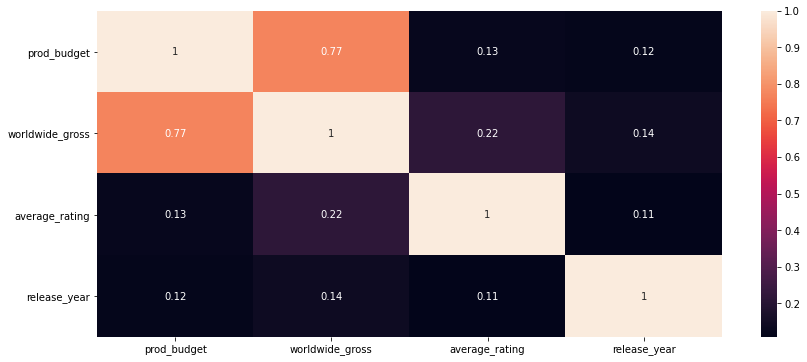

In [332]:
plt.figure(figsize=(14,6))
sns.heatmap(X.corr(), annot=True)


Production budget and worldwide gross revenue are highly correlated.
Need to get rid of worldwide gross and leave production budget.

In [333]:
X = X.drop(columns = ['worldwide_gross'])


In [334]:
X.head()

,prod_budget,average_rating,release_year
0,350000000,6.0,2019
0,350000000,6.0,2019
0,350000000,6.0,2019
1,330600000,7.3,2015
1,330600000,7.3,2015


In [335]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 0 to 1746
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prod_budget     4222 non-null   int64  
 1   average_rating  4222 non-null   float64
 2   release_year    4222 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 131.9 KB


In [336]:
# Creating a function that standardizes the data in a given column
def standardizer(col):
    col_standardized = (col - col.mean()) /col.std()
    return col_standardized

In [337]:
X_standard = X.apply(standardizer)

In [338]:
X_standard.describe()

,prod_budget,average_rating,release_year
count,4.222000e+03,4.222000e+03,4.222000e+03
mean,1.077090e-16,1.918566e-16,-1.137676e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.374460e-01,-4.693472e+00,-6.072405e+00
25%,-6.554326e-01,-5.676486e-01,-2.614193e-01
50%,-3.821665e-01,1.199887e-01,1.134830e-01
75%,2.554543e-01,7.093921e-01,6.758364e-01
max,5.538598e+00,2.772304e+00,1.238190e+00


In [340]:
X_standard_aug = sm.add_constant(X_standard)

In [341]:
#Fit the results
results_standardized = sm.OLS(y, X_standard_aug).fit()

In [342]:
#Get the weights
weights = results_standardized.params
weights

const             2.872138
prod_budget      -0.675623
average_rating   -0.217244
release_year      0.312055
dtype: float64

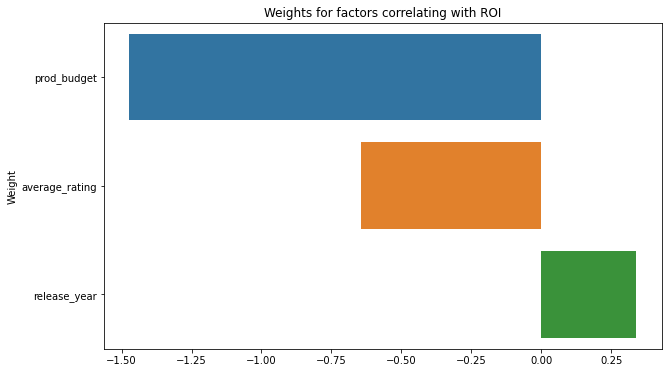

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title('Weights for factors correlating with ROI')
plt.ylabel('Weight')
plt.savefig('Weights_for_ROI.jpg')

Production budget is highly negatively correlated with ROI.

Average Rating has a slight negative correlation with ROI.

Release year is slightly positively correlated.

In [98]:
results_standardized.rsquared

0.013322301216054488

R squared is very weak. This tells us these correlations aren't meaningful ones. Our regression model is too weak to be a reliable predictor of ROI despite the correlations.

In [99]:
results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.82
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           5.99e-09
Time:                        16:25:16   Log-Likelihood:                -12533.
No. Observations:                3074   AIC:                         2.507e+04
Df Residuals:                    3070   BIC:                         2.510e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1524      0.258     16.123      0.000       3.647       4.657
prod_budget       -1.4727      0.261     -5.635      0.000      -1.985      -0.960
average_rating    -0.6452      0.262     -2.459      0.014      -1.160      -0.131
release_year       0.3396      0.262      1.295      0.196      -0.175       0.854
==============================================================================
Omnibus:                     7257.941   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55123777.986
Skew:                          23.377   Prob(JB):                         0.00
Kurtosis:                     657.361   Cond. No.                         1.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Production budget and average rating have very small p-values. We can reject the null for these.

Release year has a large p-value. We cannot reject the null for this.

## Predicting Average Rating:

In [343]:
X2 = genres_df.drop(columns=['average_rating', 'release_date', 'title', 'genre', 'season_released'])
y2 = genres_df['average_rating']

In [344]:

X2_standard = X2.apply(standardizer)

In [345]:
X2_standard.describe()

,prod_budget,worldwide_gross,ROI,release_year
count,4.222000e+03,4222.000000,4.222000e+03,4.222000e+03
mean,1.077090e-16,0.000000,2.019544e-17,-1.137676e-14
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-8.374460e-01,-0.623606,-3.112526e-01,-6.072405e+00
25%,-6.554326e-01,-0.573571,-2.398440e-01,-2.614193e-01
50%,-3.821665e-01,-0.376334,-1.365696e-01,1.134830e-01
75%,2.554543e-01,0.081333,1.497707e-02,6.758364e-01
max,5.538598e+00,8.404663,3.317450e+01,1.238190e+00


In [346]:
X2_standard_augmented = sm.add_constant(X2_standard)

In [347]:
results2_standardized = sm.OLS(y2, X2_standard_augmented).fit()

In [348]:
weights = results2_standardized.params
weights

const              6.377854
prod_budget       -0.121032
worldwide_gross    0.305315
ROI               -0.053824
release_year       0.082315
dtype: float64

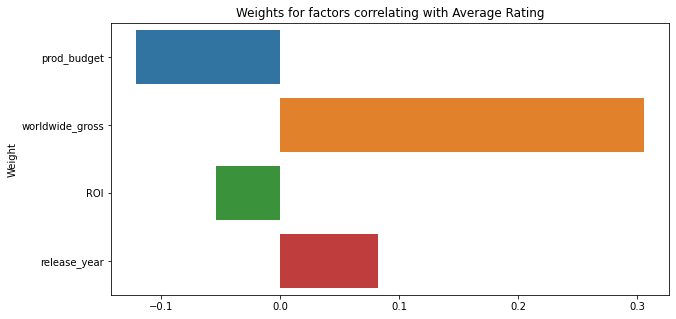

In [349]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1:].index, x= weights[1:].values)
plt.title("Weights for factors correlating with Average Rating")
plt.ylabel('Weight')
plt.savefig('Weights_for_Rating.jpg')

Gross revenue has a slightly positive correlation with ratings.

Production budget ha a slightly negative correlation with ratings.

But how reliable are these variables as predictors?

In [107]:
results2_standardized.rsquared

0.07057933267939043

Unfortunately these are also unreliable predictors of our target. The R squared value is extremely weak.

In [108]:
results2_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         average_rating   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     58.26
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.82e-47
Time:                        16:25:17   Log-Likelihood:                -4275.1
No. Observations:                3074   AIC:                             8560.
Df Residuals:                    3069   BIC:                             8590.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.4597      0.018    368.099      0.000       6.425       6.494
prod_budget        -0.1299      0.029     -4.474      0.000      -0.187      -0.073
worldwide_gross     0.2996      0.029     10.352      0.000       0.243       0.356
ROI                -0.0757      0.018     -4.225      0.000      -0.111      -0.041
release_year        0.1301      0.018      7.331      0.000       0.095       0.165
==============================================================================
Omnibus:                      253.507   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.331
Skew:                          -0.660   Prob(JB):                     2.83e-80
Kurtosis:                       4.058   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is bad - these variables arent explaining Average Rating well.

The p-values are also all 0. We can reject the null.

## Linear Regression Model of rating on ROI

In [109]:
genres_df.head()

,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI,release_year,season_released
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Action,7.3,3.243841,2015,Spring
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Adventure,7.3,3.243841,2015,Spring
1,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,Sci-Fi,7.3,3.243841,2015,Spring
2,2018-04-27,Avengers: Infinity War,300000000,2048134200,Action,8.5,5.827114,2018,Spring
2,2018-04-27,Avengers: Infinity War,300000000,2048134200,Adventure,8.5,5.827114,2018,Spring


In [350]:
#Isolating ratings and ROI into a new dataframe
ROI_rating_df = genres_df.drop(columns = ['release_date', 'title', 'prod_budget', 'worldwide_gross', 'genre', 'release_year', 'season_released'])
ROI_rating_df.head()

,average_rating,ROI
0,6.0,-0.572108
0,6.0,-0.572108
0,6.0,-0.572108
1,7.3,3.243841
1,7.3,3.243841


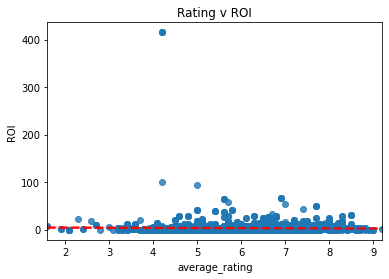

In [351]:
#Visualizing rating and ROI
fig, ax = plt.subplots()
sns.regplot(x = 'average_rating', y = 'ROI', data = ROI_rating_df, line_kws = {"color": "red", "linestyle": "--", "label": "Regression Line"}, ax = ax)
ax.set_title('Rating v ROI')
plt.savefig('rating_ROI_model.jpg')

This shows that ROI and ratings are independent of one another. This tells us that critics ratings do not have a direct correlation with the profits to be made on a film. Despite how people may feel about critics, they can't stop us from making money.

In [352]:
#Isolating horror movies in a new dataframe
horror_df = genres_df[genres_df['genre'] == 'Horror']
horror_df


,release_date,title,prod_budget,worldwide_gross,genre,average_rating,ROI,release_year,season_released
43,2013-06-21,World War Z,190000000,531514650,Horror,7.0,1.797446,2013,Summer
60,2018-08-10,The Meg,178000000,529530715,Horror,5.7,1.974892,2018,Summer
67,2017-11-22,Coco,175000000,798008101,Horror,7.4,3.560046,2017,Fall
112,2012-05-11,Dark Shadows,150000000,238202668,Horror,6.2,0.588018,2012,Spring
114,2010-02-12,The Wolfman,150000000,142634358,Horror,5.8,-0.049104,2010,Winter
...,...,...,...,...,...,...,...,...,...
1704,1980-01-01,Maniac,350000,10000000,Horror,4.8,27.571429,1980,Winter
1712,2005-07-22,November,250000,191862,Horror,7.2,-0.232552,2005,Summer
1722,2005-01-07,Solitude,200000,6260,Horror,3.9,-0.968700,2005,Winter
1732,2015-07-10,The Gallows,100000,41656474,Horror,4.2,415.564740,2015,Summer


In [353]:
#Isolating the rating and ROI again for Horror films - to double check our regression model
ROI_rating_horror = horror_df.drop(columns = ['release_date', 'title', 'prod_budget', 'worldwide_gross', 'genre', 'release_year', 'season_released'])
ROI_rating_horror

,average_rating,ROI
43,7.0,1.797446
60,5.7,1.974892
67,7.4,3.560046
112,6.2,0.588018
114,5.8,-0.049104
...,...,...
1704,4.8,27.571429
1712,7.2,-0.232552
1722,3.9,-0.968700
1732,4.2,415.564740


The linear regression model holds true even when we isolate the Horror movies.

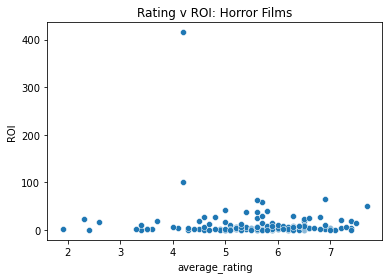

In [102]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'average_rating', y = 'ROI', data = ROI_rating_horror, ax = ax)
ax.set_title('Rating v ROI: Horror Films')
plt.savefig('rating-ROI_linear_model_horror.jpg')

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'average_rating', y = 'ROI', data = ROI_rating_horror, ax = ax)
ax.set_title('Rating v ROI: Horror Films')
plt.savefig('rating-ROI_linear_model_horror.jpg')

In [161]:
ROI_gross_horror = horror_df.drop(columns = ['release_date', 'title', 'average_rating', 'prod_budget', 'genre', 'release_year', 'season_released'])
ROI_gross_horror

,worldwide_gross,ROI
43,531514650,1.797446
60,529530715,1.974892
67,798008101,3.560046
112,238202668,0.588018
132,532938302,2.947691
...,...,...
1676,1011535,0.348713
1692,680914,0.361828
1701,1162014,1.905035
1704,10000000,27.571429


## Visualizing Budget and ROI of Horror films.
There is no linear relationship here either. These two variables seem to be independent of one another.

Text(0.5, 1.0, 'Budget v ROI: Horror Films')

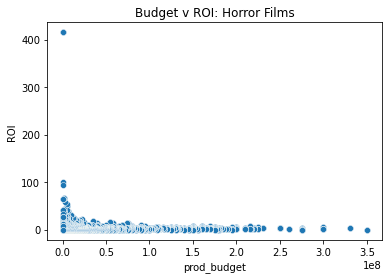

In [357]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'prod_budget', y = 'ROI', data = genres_df ,ax = ax)
ax.set_title('Budget v ROI: Horror Films')

In [362]:
top_genres_by_rating_avgROI

,genre,Avg_ROI
14,Mystery,9.086906
11,Horror,8.520359
19,Thriller,5.454036
6,Documentary,5.128237
3,Biography,4.254537
4,Comedy,2.762548
17,Sci-Fi,2.619174
2,Animation,2.583700
7,Drama,2.519749
0,Action,2.502561


## Average ROI by Genre

Shows us the highest profitting genres on average are Mystery, Horror, Thriller, Documentary, and Biography

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


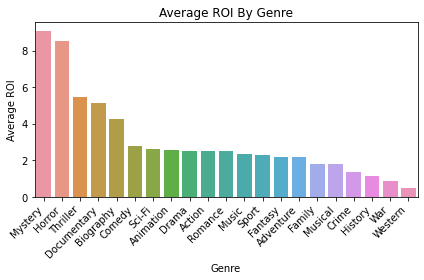

In [364]:
sns.barplot('genre', 'Avg_ROI', data = top_genres_by_rating_avgROI)
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=45, ha='right')
plt.title('Average ROI By Genre')

plt.tight_layout()
plt.savefig('avg_ROI_by_genre.jpg')

## Distribution of budgets for each genre

Sci-Fi, Action, Adventure, and Fantasy have the highest variances of budget. Meanwhile Horror has a very narrow variance along with mystery, Documentary and Biography.

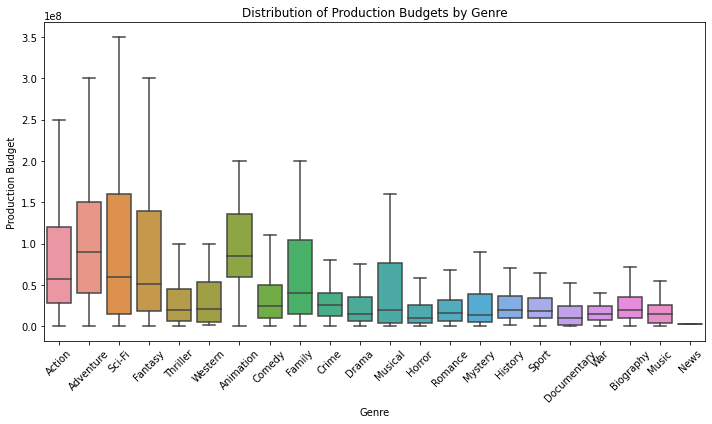

In [368]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = genres_df, x = 'genre', y = 'prod_budget',showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Production Budget')
plt.title('Distribution of Production Budgets by Genre')
plt.tight_layout()
plt.savefig('budget_distribution.jpg')

## Distribution of ROI by Genre

Horror and Mystery both have high variances of ROI. This tells us that there are just as many chances that a horror film will flop as it will blow up the box office.

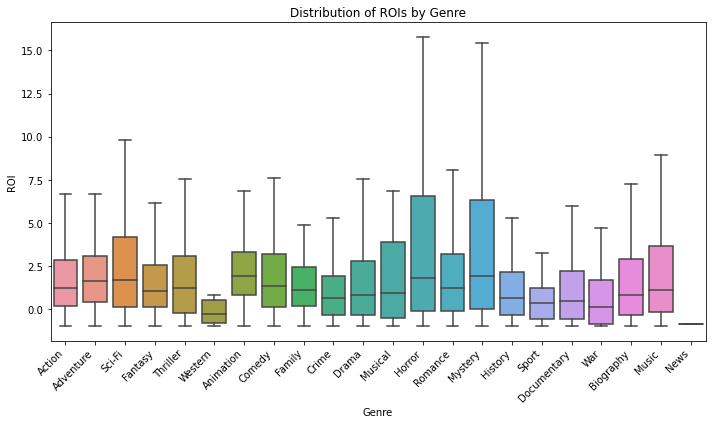

In [366]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = genres_df, x = 'genre', y = 'ROI', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.title('Distribution of ROIs by Genre')
plt.tight_layout()
plt.savefig('ROI_distribution.jpg')

# Final Recommendations

1. Invest in Horror and Mystery Genre films - these are the one's that don't require large budgets and are more likely to receive higher returns
2. Invest in Franchise Movies - the highest grossing films are all franchise movies
3. Don't splurge to make big bucks - you may think that the more money you throw into production the more you're likely to get in profit, but gross sales are not ROI. The highest ROI films and best performing genres had median production budgets under 25 million. 

Next steps:

Look into what actors and directors might bring more predictability to your success model. Though our variables weren't good predictors of success, gross revenues of directors or actors, may be better predictors. Other variables to take into consideration could be specific movie themes, like Feminism, Justice/Injustice, Superheros, etc.